Funcion de Transferencia de High-Passs

In [112]:
%pip install matplotlib
import sympy as ss
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
# Definición de símbolos
wo, Q = ss.symbols(r'\omega_o Q')
Ga1, Ga2, Gb, G1, G41, G42 = ss.symbols('G_{a1} G_{a2} G_b G_1 G_{41} G_{42}', positive=True)
C3, C22, C21 = ss.symbols('C_3 C_{22} C_{21}', positive=True)
Ra1, Ra2, Rb, R1, R41, R42 = ss.symbols('R_{a1} R_{a2} R_b R_1 R_{41} R_{42}', positive=True)
n2_sym, n0_sym, s = ss.symbols('n_2 n_0 s')
T, wz = ss.symbols(r'T \omega_z')
Q_sym, wo_sym = ss.symbols(r'Q w_o')

# Conductancias a resistencias
reemplazo = {
    G1: 1 / R1, G41: 1 / R41, G42: 1 / R42,
    Ga1: 1 / Ra1, Ga2: 1 / Ra2, Gb: 1 / Rb
}

# Transferencia simbólica
T_expr = (n2_sym*(s**2 + wz**2))/(s**2 + s*(wo_sym/Q_sym) + wo_sym**2)
display(Math("T(s) = " + latex(T_expr)))

# wz = sqrt(n0/n2)
T_mod = T_expr.subs(wz, ss.sqrt(n0_sym/n2_sym))
display(Math("T(s) = " + latex(T_mod)))

# Definición de n2 y n0 (como expresiones nuevas)
n2_expr = ((Ga1+Ga2+Gb)/Gb)*(C22/(C21 + C22)) - (Ga2/Gb)
n0_expr = (G1*(G42+G41))/(C3*(C21 + C22)) * ((G42/(G41+G42))*((Ga1+Ga2+Gb)/Gb)-(Ga2/Gb))
wo_expr = ss.sqrt((G1 * (G41 + G42)) / (C3 * (C21 + C22)))
Q_expr = ss.sqrt((G1 * (G41 + G42)) / (C3 * (C21 + C22))) *(1/ (  (G41 + G42) * (1 / (C21 + C22) + 1 / C3)- (G1 / (C21 + C22)) * ((Ga1 + Ga2) / Gb)))

# Reemplazar conductancias por resistencias
n2_res = n2_expr.subs(reemplazo).simplify()
n0_res = n0_expr.subs(reemplazo).simplify()
wo_res = wo_expr.subs(reemplazo).simplify()
Q_res   = Q_expr.subs(reemplazo).simplify()

# Sustituir en T
T_mod2 = T_mod.subs({
    n2_sym: n2_res,
    n0_sym: n0_res,
    wo_sym: wo_res,
    Q_sym: Q_res
})

# Mostrar resultados
display(Math("n_2 = " + latex(n2_res)))
display(Math("n_0 = " + latex(n0_res)))
display(Math("w_o = " + latex(wo_res)))
display(Math("Q = " + latex(Q_res)))
display(Math("T(s) = " + latex(T_mod2)))

w = ss.symbols(r'\omega')
j = ss.I  # Unidad imaginaria

# Sustituir s = j*w
T_jw = T_mod2.subs(s, j*w)
display(Math("T(jw) = " + latex(T_jw)))

# Calculo en dB
T_mod = ss.Abs(T_jw)
display(Math(r"|T(jw)| = " + latex(T_mod)))

#Reemplazo de




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Reemplazo numericos


In [114]:
valores = {
    Ra1: 63.7e3,
    Ra2: 408e3,
    Rb: 330,
    R1: 70.2,
    R41: 4.61e3,
    R42: 169e3,
    C3: 133e-9,
    C22: 33e-9,
    C21: 100e-9
}

T_mod_num = T_mod.evalf(subs=valores)
display(Math(r"|T(jw)| = " + latex(T_mod_num)))

<IPython.core.display.Math object>

Obtengo polos y ceros y ganancias


In [115]:
n2_num = n2_res.evalf(subs=valores)
n0_num = n0_res.evalf(subs=valores)
wo_num = wo_res.evalf(subs=valores)
Q_num = Q_res.evalf(subs=valores)
wz = ss.sqrt( (n0_num/n2_num))
Gain = n0_num/(wo_num)**2
Gain_db = 20 * np.log10(float(Gain))


import math
twopi = 2*math.pi
fo= wo_num/twopi
fz = wz/twopi

display(Math(r"f_o = " + latex(fo)))
display(Math(r"f_z = " + latex(fz)) )
display(Math(r"Q = " + latex(Q_num)))
display(Math(r"Gain(dB) = " + latex(Gain_db) + r"\ dB") )


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [119]:
T_db_10 = 20*np.log10(float(T_mod_num.subs(w, 10*twopi)))
display(Math(r"T_{dB}(10Hz) = " + latex(T_db_10)))


T_db_fo = 20*np.log10(float(T_mod_num.subs(w, fo*twopi)))
display(Math(r"T_{dB}(fo) = " + latex(T_db_fo)))

T_db_100k = 20*np.log10(float(T_mod_num.subs(w, 100e3*twopi)))
display(Math(r"T_{dB}(100kHz) = " + latex(T_db_100k)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

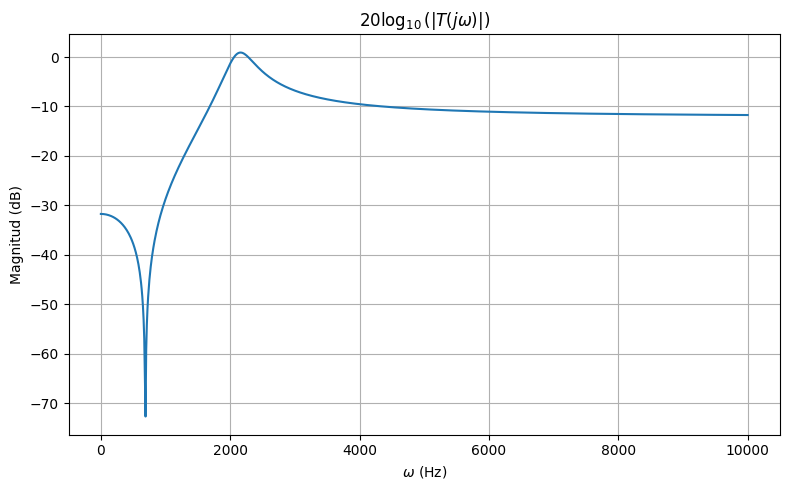

In [142]:
f = ss.symbols('f')
T_mod_num = 0.248797558352433 * ss.Abs(((twopi*f)**2 - 18683885.74981) / (-(twopi*f)**2 + 2709.43848968119*ss.I*(twopi*f) + 179451343.044671))

# Convertimos a función numérica evaluable
T_mod_func = ss.lambdify(f, T_mod_num, modules='numpy')

# Dominio de frecuencias
w_vals = np.linspace(0.01, 10e3, 1000)

# Evaluación y conversión a decibeles
T_vals = T_mod_func(w_vals)
T_db = 20 * np.log10(np.abs(T_vals))

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(w_vals, T_db)
plt.title(r'$20 \log_{10}(|T(j\omega)|)$')
plt.xlabel(r'$\omega$ (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()


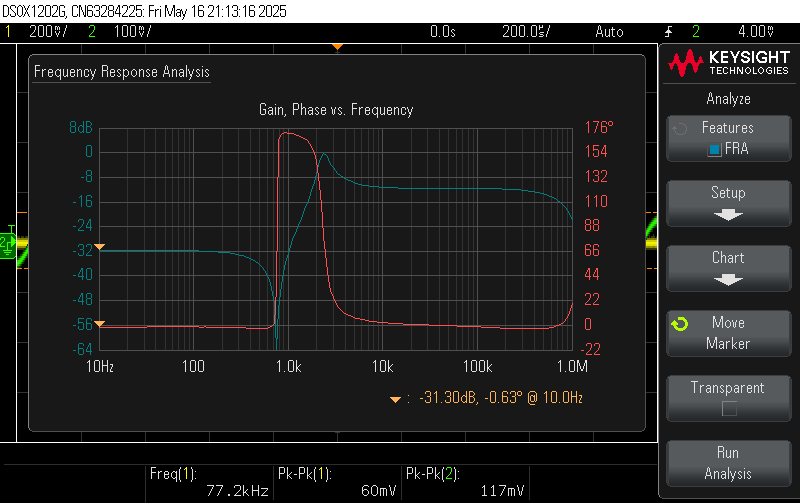